# Automatische Zeichenerkennung mittels eines Backpropagation-Netzes (SS2016)

### Cordula Eichhorn, Hannes Schröder, Meik Jejkal

## Aufgabenstellung

Aus vorgegebenen Datensätzen menschlicher Handschriftenproben sollen mittels eines neuronalen Backpropargation Netzes die jeweiligen Großbuchstaben des 26 stelligen deutschen Alphabets erkannt werden. Zur Realisierung des Projekts wurde das scikit-learn framework vorgegeben. Die Ergebnisse in Form von Erkennungs-, Falsch- zuweisungs- und Rückweisungsraten sollen bei verschiedener Parametrisierung grafisch aufgetragen und erläutert werden. Dabei spielen folgende Punkte eine übergeordnete Rolle:

• Modifikation der Parameter: Lernrate, Momentum und Anfangsbelegung der Gewichte  
• Unterstützung für reine Feedforward-Netze (Vermaschungen, Schleifen oder weiterführenden Topologien bleiben außen vor)  
• Konstruktionen mehrlagiger Netze mit mindestens 1 und 2 versteckten Schichten
(hidden Layers) mit jeweils wählbarer Neuronenanzahlen  
• Unterstützung für musterweises und epochenweises Lernen  
• Identischer innerer Aufbau der Neuronen etwa mit sigmoider Aktivierungsfunktion 
(ohne Betrachtung verschiedener Aktivierungsfunktionen für unterschiedliche Neuronen)
• Lernen von Einzelmustern bzw. Lernen in Epochen  

Um das neuronale Netz anzulernen können Windows interne Schriftarten verwendet werden. 

## Trainingsdaten

Die Trainingsdaten sind sog. pattern files (.pat) und bestehen aus einer Binärbildmatrix der Größe 14x14. Diese ist allerdings nicht direkt binär codiert. Sie enthält stattdessen -0.5 als Repräsentant für 0 und 0.5 entsprechend für 1. Mit Hilfe dieser Darstellung lassen sich sowohl handgeschriebene als auch maschinell generierte Schriftarten abbilden. Die Schriftproben wurden zuvor in vorherigen Semestern gesammelt, eingescannt und in digitaler Form bereitgestellt. Einige der Windows internen Schriftarten wurden ebenfalls in diese Form gebracht. Im Folgenden ist ein Beispiel aus einer Handschriftenprobe zu sehen:

In [11]:
# Ursprungsform der Daten:

M = [

[-0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50, -0.50, -0.50, -0.50],
[-0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50,  0.50, -0.50, -0.50, -0.50],
[-0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50,  0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50,  0.50, -0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50, -0.50, -0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50, -0.50,  0.50,  0.50,  0.50,  0.50,  0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50,  0.50,  0.50,  0.50,  0.50,  0.50,  0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50,  0.50,  0.50,  0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50,  0.50,  0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50,  0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50,  0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50, -0.50, -0.50], 
    ]

# gewünschte Form

Z = [
       
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], 
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], 
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], 
[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0], 
[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], 
    ]

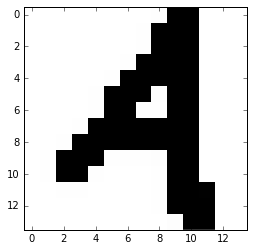

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


plt.imshow(Z, interpolation='none', cmap=plt.cm.binary)

## Erstes Experiment

• Netztopologie mit nur einer versteckten Schicht  
• Musterweises Lernen  
• einfache Initialisierung der Gewichte mit Zufallswerten zwischen -1 und 1  